### The goal of this project is to build an ML model that can accurately predict the `is_click` variable (whether a user has clicked on an ad)

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import classification_report, accuracy_score
import math
import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [2]:
df = pd.read_csv("data/Ad_click_prediction_train.csv")
df.head(5)

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [4]:
df.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


### Missing Data Analysis

In [5]:
# Chcek for missing values
df.isnull().any()

session_id                False
DateTime                  False
user_id                   False
product                   False
campaign_id               False
webpage_id                False
product_category_1        False
product_category_2         True
user_group_id              True
gender                     True
age_level                  True
user_depth                 True
city_development_index     True
var_1                     False
is_click                  False
dtype: bool

In [6]:
# Percent missing values
missing_ratio = df.isnull().sum()/len(df)*100
print(f"Missing Data Ratio:\n{round(missing_ratio,2)}")

Missing Data Ratio:
session_id                 0.00
DateTime                   0.00
user_id                    0.00
product                    0.00
campaign_id                0.00
webpage_id                 0.00
product_category_1         0.00
product_category_2        78.97
user_group_id              3.94
gender                     3.94
age_level                  3.94
user_depth                 3.94
city_development_index    27.01
var_1                      0.00
is_click                   0.00
dtype: float64


### Feature Selection and Removal of Irrelevant Columns

In [7]:
# Drop cols with missing values or irrelevant features
columns_to_drop = ['session_id', 'user_id', 'product_category_2', 'user_depth', 'city_development_index', 'age_level', 'DateTime']
df = df.drop(columns=columns_to_drop, axis=1)

### Correlation Analysis

In [8]:
# Correlation analysis to identify relationships between features
correlation = df.corr()
correlation["is_click"].sort_values(ascending=False)

is_click              1.000000
webpage_id            0.041717
campaign_id           0.011447
var_1                 0.011296
user_group_id        -0.007815
product_category_1   -0.016531
Name: is_click, dtype: float64

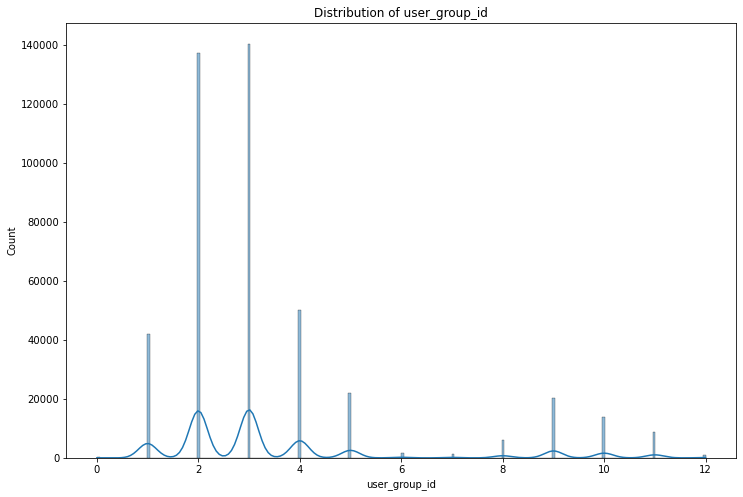

In [9]:
# Plot the distribution of user group id
plt.figure(figsize=(12,8))
sns.histplot(df['user_group_id'], kde=True)
plt.title('Distribution of user_group_id')
plt.show()

### Data Preprocessing and Encoding

In [10]:
# Handle missing values in 'gender' and 'user_group_id'
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['user_group_id'] = df['user_group_id'].fillna(df['user_group_id'].median())

In [11]:
# Perform one-hot encoding for categorical variables
encoded_df = pd.get_dummies(df, columns=['gender', 'product'], drop_first=True)

### Data Splitting and Scaling

In [12]:
# Split data into train test split
X = encoded_df.drop(columns=["is_click"])
y = encoded_df["is_click"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=111)

In [13]:
# Stadardize the data
scaler = SS()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling Imbalanced Data

In [14]:
# Balance data
smote = SMOTE(random_state=111)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [15]:
# Convert to DataFrame and retain column names
X_train_balanced = pd.DataFrame(X_train_balanced, columns=X.columns)

### Model Training

In [16]:
# Logistic regression model
model = LogReg()
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

### Evaluation of Model Performance

In [17]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred))
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.56      0.70     86365
           1       0.08      0.54      0.14      6294

    accuracy                           0.56     92659
   macro avg       0.51      0.55      0.42     92659
weighted avg       0.88      0.56      0.67     92659

Logistic Regression - Accuracy: 55.99%


### Test Dataset Prediction

In [18]:
# Load in test data
# Drop cols with missing values or irrelevant features
test_df = pd.read_csv("data/Ad_Click_prediciton_test.csv")
test_df = test_df.drop(columns=columns_to_drop, axis=1)

In [19]:
# Handle missing values in 'gender' and 'user_group_id'
test_df['user_group_id'] = test_df['user_group_id'].fillna(df['user_group_id'].median())
test_df['gender'] = test_df['gender'].fillna(df['gender'].mode()[0])

# One-hot encoding
encoded_test_df = pd.get_dummies(test_df, columns=['gender', 'product'], drop_first=True)

# Apply one-hot encoding to categorical variables
encoded_test_df = encoded_test_df.reindex(columns=X.columns, fill_value=0)

X_test = scaler.transform(encoded_test_df)

### Test Set Performance Evaluation

In [20]:
# Predict on new test set
y_pred_test = model.predict(X_test)

print(y_pred_test)

[1 1 1 ... 0 0 0]


In [21]:
# Append predictions to the test dataset
test_df['is_click'] = y_pred_test

# Save the test dataset with predictions to a CSV file
test_df.to_csv("data/predictions/Test_Set_with_Predictions.csv", index=False)

In [22]:
# Proportion of clicked vs not clicked
print("Click: " + str(round(test_df['is_click'].value_counts(normalize=True)[1]*100,2))+"%")
print("Did not click: " + str(round(test_df['is_click'].value_counts(normalize=True)[0]*100,2))+"%")

Click: 53.29%
Did not click: 46.71%


In [23]:
overall_click_rate = test_df['is_click'].mean()
print(f"Click Through Rate: {overall_click_rate:.2%}")

Click Through Rate: 53.29%


In [24]:
# Click through rate by gender and by product type
print(round(test_df.groupby('gender')['is_click'].mean()*100,2).astype(str)+"%")
print("\n")
print(round(test_df.groupby('product')['is_click'].mean()*100,2).astype(str)+"%")

gender
Female    39.71%
Male      55.03%
Name: is_click, dtype: object


product
A    28.09%
B     8.76%
C    40.69%
D    83.14%
E    28.96%
F      0.0%
G      0.0%
H    66.13%
I    41.21%
J    100.0%
Name: is_click, dtype: object


### Random Forest Model

In [25]:
rf_model = RF(random_state=111)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=111)

In [26]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (128858, 15)
y_test shape: (92659,)


In [27]:
# Adjust X_test and y_test to have the same length for compatibility
min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Adjusted X_test shape: {X_test.shape}")
print(f"Adjusted y_test shape: {y_test.shape}")

Adjusted X_test shape: (92659, 15)
Adjusted y_test shape: (92659,)


In [28]:
rf_model = RF(random_state=111)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model and evaluate performance
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     86365
           1       0.09      0.00      0.00      6294

    accuracy                           0.93     92659
   macro avg       0.51      0.50      0.48     92659
weighted avg       0.87      0.93      0.90     92659

Random Forest Accuracy: 93.20%


In [29]:
feature_importances = rf_model.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance*100:.1f}%")

campaign_id: 13.8%
webpage_id: 12.1%
product_category_1: 12.7%
user_group_id: 38.3%
var_1: 5.7%
gender_Male: 2.1%
product_B: 1.5%
product_C: 2.4%
product_D: 2.2%
product_E: 0.8%
product_F: 1.7%
product_G: 1.2%
product_H: 2.4%
product_I: 1.9%
product_J: 1.1%


In [30]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 93.25%
Test Accuracy: 93.20%
